SIMPLE LINEAR REGRESSION

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0.5, 1.0, 'Weight vs Height')

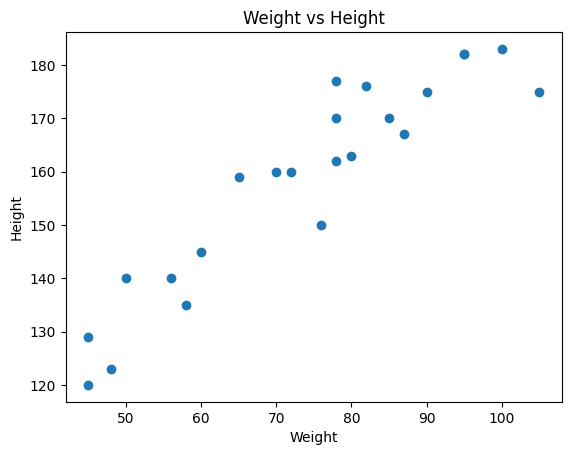

In [6]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Weight vs Height")

In [15]:
###Divide our dataset based on independant and dependant features
X=df[['Weight']]
y=df[['Height']]

In [16]:
####2. Trian Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)  

In [17]:
X_train.shape,X_test.shape

((18, 1), (5, 1))

In [18]:
###Standardization the dataset train independant data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [19]:
X_train_scaled

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [20]:
X_test_scaled

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

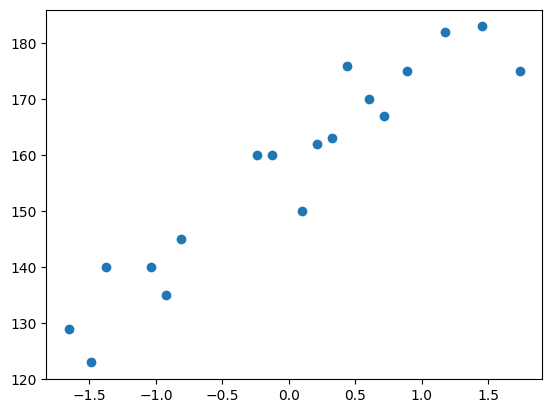

In [22]:
plt.scatter(X_train_scaled,y_train)


In [26]:
###Train our model using linear regression bcoz we have only 1 feature
from sklearn.linear_model import LinearRegression
model=LinearRegression()

model.fit(X_train_scaled,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [29]:
print("The coefficient of of weight is : ", model.coef_)
print("The intercept is : ",model.intercept_)

The coefficient of of weight is :  [[17.03440872]]
The intercept is :  [157.5]


In [34]:
##Prediction
y_pred=model.predict(X_train_scaled)

In [35]:
y_pred

array([[187.0869102 ],
       [141.82375282],
       [182.27168069],
       [161.08467086],
       [132.19329381],
       [177.45645118],
       [129.3041561 ],
       [143.74984463],
       [153.38030364],
       [159.15857905],
       [134.11938561],
       [139.89766102],
       [155.30639545],
       [172.64122168],
       [164.93685446],
       [167.82599217],
       [169.75208397],
       [163.01076266]])

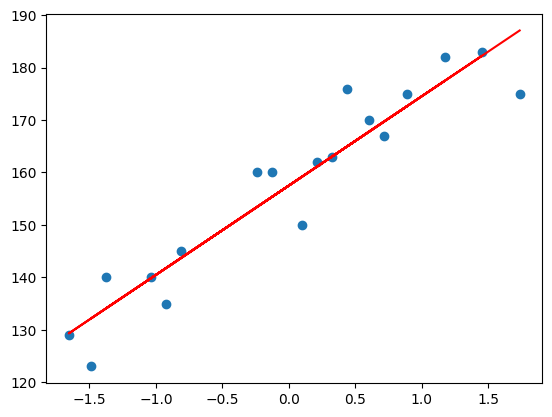

In [37]:
###Plotting best fit line using scaled trained data and predicted data
plt.scatter(X_train_scaled,y_train)
plt.plot(X_train_scaled,y_pred,color='red')

PREDICTION OF TRAIN DATA
1. predicted height output=intercept_ + coef(weight)

2. y_pred_train = 157.5+ 17.03(X_train_scaled)

PREDICTION OF TEST DATA

1. predicted height output = intercept + coef(weight)

2. y_pred-test= 157.5+ 17.03(X_test_scaled)

In [38]:
y_pred_train = model.predict(X_train_scaled)

In [39]:
y_pred_train

array([[187.0869102 ],
       [141.82375282],
       [182.27168069],
       [161.08467086],
       [132.19329381],
       [177.45645118],
       [129.3041561 ],
       [143.74984463],
       [153.38030364],
       [159.15857905],
       [134.11938561],
       [139.89766102],
       [155.30639545],
       [172.64122168],
       [164.93685446],
       [167.82599217],
       [169.75208397],
       [163.01076266]])

In [40]:
y_pred_test= model.predict(X_test_scaled)

In [42]:
y_pred_test,y_test

(array([[161.08467086],
        [161.08467086],
        [129.3041561 ],
        [177.45645118],
        [148.56507414]]),
     Height
 15     177
 9      170
 0      120
 8      182
 17     159)

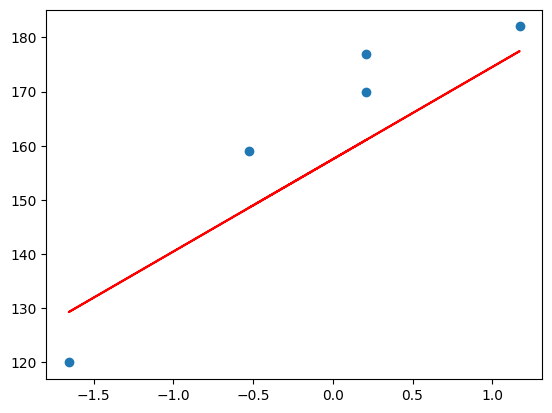

In [43]:
plt.scatter(X_test_scaled,y_test)
plt.plot(X_test_scaled,y_pred_test,color='red')

In [50]:
###performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error,  r2_score, adjusted_rand_score
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred_test)
adj= 1 - ( 1-score) * ( len(y_test) - 1 ) / ( len(y_test) - X_test.shape[1] - 1 )

print("MSE",mse)
print("MAE",mae)
print("RMSE",rmse)
print("R2 score",score)
print("ADJ",adj)

MSE 109.77592599051664
MAE 9.822657814519232
RMSE 10.477400726827081
R2 score 0.776986986042344
ADJ 0.7026493147231252


In [52]:
###new data points for prediction

scaled_weight = scaler.transform([[80]])
scaled_weight

c:\Users\HP\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [55]:
print("New predicted height of 80 is : ",model.predict([scaled_weight[0]]))

New predicted height of 80 is :  [[163.01076266]]


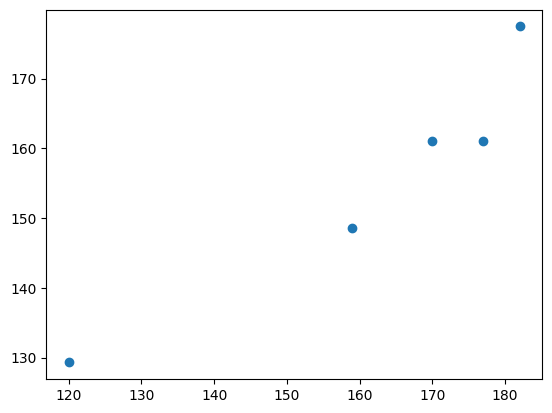

In [56]:
###Assumptions
##plot scatter plot for prediction
plt.scatter(y_test,y_pred_test)

In [57]:
###Residuals
residual = y_test - y_pred_test
residual

,Height
15,15.915329
9,8.915329
0,-9.304156
8,4.543549
17,10.434926


C:\Users\HP\AppData\Local\Temp\ipykernel_3240\1996836229.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual,kde=True)


<Axes: ylabel='Density'>

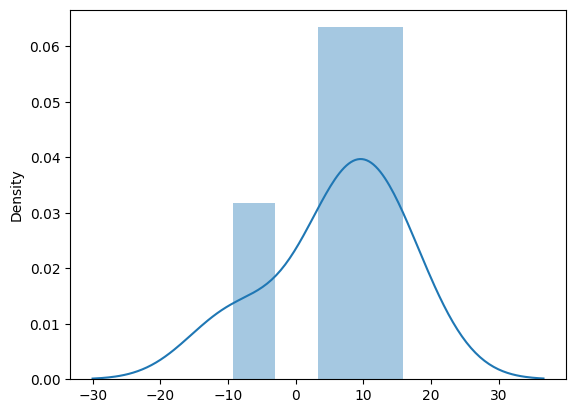

In [63]:
##Ploting ths residuals
sns.distplot(residual,kde=True)